# Name: Yash Meshram
# Roll No.: 18110192

# Task 3 (a)

In [1]:
# Mesurements of my body
l1 = 38               # Hip-to-Knee distance  = Length of link 1 = 38 cm
l2 = 43               # Knee-to-Ankle distance = Length of link 2 = 43 cm

# Task 3 (b)

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_excel('Gait_DATA.xlsx')
df

,X (cm),Y (cm)
0,46.108625,12.809129
1,45.628312,12.786217
2,45.105438,12.732817
3,44.568188,12.646511
4,44.005938,12.526861
...,...,...
256,49.286187,9.933923
257,49.174875,10.148979
258,49.047063,10.359342
259,48.911938,10.559667


In [4]:
x = df.drop('Y (cm)', axis = 1)
x

,X (cm)
0,46.108625
1,45.628312
2,45.105438
3,44.568188
4,44.005938
...,...
256,49.286187
257,49.174875
258,49.047063
259,48.911938


In [5]:
y = df['Y (cm)']
y

0      12.809129
1      12.786217
2      12.732817
3      12.646511
4      12.526861
         ...    
256     9.933923
257    10.148979
258    10.359342
259    10.559667
260    12.809129
Name: Y (cm), Length: 261, dtype: float64

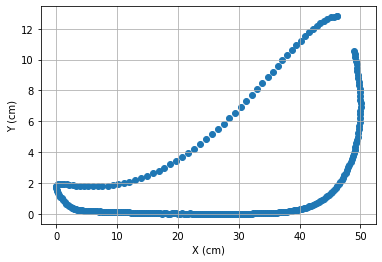

In [6]:
plt.scatter(x, y)
plt.xlabel('X (cm)')
plt.ylabel('Y (cm)')
plt.grid(True)

# Task 3 (c)

In [7]:
# Taken from Repository
# Forward Kinematics 2R Planar Fixed Axis
def forward_kinematics(q1, q2, l1, l2):
    x1 = l1 * np.cos(q1)
    y1 = l1 * np.sin(q1)
    x2 = l1 * np.cos(q1) + l2 * np.cos(q2 + q1)  # l2*np.cos(q2+q1) will be second term if q2 measured from link1
    y2 = l1 * np.sin(q1) + l2 * np.sin(q2 + q1)  # l2*np.sin(q2+q1) will be second term if q2 measured from link1
    return x2, y2

# Inverse Kinematics 2R Planar Fixed Axis
def inverse_kinematics(x, y, l1, l2, elbow):  # elbow parameter = 1 or -1 for elbow down and up configurations
    D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
    if elbow == 1:
        D = (x ** 2 + y ** 2 - l1 ** 2 - l2 ** 2) / (2 * l1 * l2)
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
        q2 = q2 + q1  # if q2 is not measured from inertial frame then remove this line
    if elbow == -1:
        q2 = elbow * np.arctan2(np.sqrt(1 - D ** 2), D)  # q2 as measured from frame of link 1
        q1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(q2), l1 + l2 * np.cos(q2))
    return q1, q2

In [8]:
elbow = -1    # will always be up
l = [x for x in inverse_kinematics(df['X (cm)'], df['Y (cm)'], l1, l2, elbow)]
p = pd.DataFrame(l)
pp = p.transpose()
pp = pp.rename(columns={0: "q1 (rad)", 1: "q2 (rad)"})
pp

/home/yash-meshram/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,q1 (rad),q2 (rad)
0,1.296892,-1.882721
1,1.307618,-1.897110
2,1.318878,-1.912920
3,1.329970,-1.929329
4,1.341121,-1.946644
...,...,...
256,1.180660,-1.807136
257,1.186509,-1.809227
258,1.192641,-1.811823
259,1.198772,-1.814674


In [9]:
df = df.join(pp)
df

,X (cm),Y (cm),q1 (rad),q2 (rad)
0,46.108625,12.809129,1.296892,-1.882721
1,45.628312,12.786217,1.307618,-1.897110
2,45.105438,12.732817,1.318878,-1.912920
3,44.568188,12.646511,1.329970,-1.929329
4,44.005938,12.526861,1.341121,-1.946644
...,...,...,...,...
256,49.286187,9.933923,1.180660,-1.807136
257,49.174875,10.148979,1.186509,-1.809227
258,49.047063,10.359342,1.192641,-1.811823
259,48.911938,10.559667,1.198772,-1.814674


In [10]:
l1 = [x for x in forward_kinematics((df['q1 (rad)']), (df['q2 (rad)']), l1, l2)]
p1 = pd.DataFrame(l1)
pp1 = p1.transpose()
pp1 = pp1.rename(columns={0: "new_X (cm)", 1: "new_Y (cm)"})
pp1

,new_X (cm),new_Y (cm)
0,46.108625,12.809129
1,45.628313,12.786217
2,45.105438,12.732817
3,44.568187,12.646511
4,44.005938,12.526861
...,...,...
256,49.286187,9.933923
257,49.174875,10.148979
258,49.047063,10.359342
259,48.911937,10.559667


In [11]:
df = df.join(pp1)
df

,X (cm),Y (cm),q1 (rad),q2 (rad),new_X (cm),new_Y (cm)
0,46.108625,12.809129,1.296892,-1.882721,46.108625,12.809129
1,45.628312,12.786217,1.307618,-1.897110,45.628313,12.786217
2,45.105438,12.732817,1.318878,-1.912920,45.105438,12.732817
3,44.568188,12.646511,1.329970,-1.929329,44.568187,12.646511
4,44.005938,12.526861,1.341121,-1.946644,44.005938,12.526861
...,...,...,...,...,...,...
256,49.286187,9.933923,1.180660,-1.807136,49.286187,9.933923
257,49.174875,10.148979,1.186509,-1.809227,49.174875,10.148979
258,49.047063,10.359342,1.192641,-1.811823,49.047063,10.359342
259,48.911938,10.559667,1.198772,-1.814674,48.911937,10.559667


## You can see that 
## X (cm) column and new_X (cm) column have same values
## Y (cm) column and new_Y (cm) column have same values